In [57]:
### Importing all the necessary libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
import time, os, psutil, csv
from itertools import repeat
from PIL import Image
from numpy import asarray
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt


In [58]:

# =============================================================================
#  Loading Data
# =============================================================================

# Load training and testing datasets
train_data = pd.read_csv('train_split_all_genes_rs20.csv', on_bad_lines='skip')
test_data = pd.read_csv('test_split_all_genes_rs20.csv', on_bad_lines='skip')



xTrain shape: (450, 16270, 1) yTrain shape: (450, 1)
xTest shape: (51, 16270, 1) yTest shape: (51, 1)


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Iteration 1
clientID 0
clientID 1
clientID 2
clientID 3
clientID 4


Server's model updated
Saving model . . .
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy  : 0.8823529411764706
Precision : 0.8859840232389253
Recall    : 0.8823529411764706
F1-Score  : 0.8828096455973694
Confusion Matrix:
 [[20  2]
 [ 4 25]]
Acc:
 0.8823529411764706
Prec:
 0.8859840232389253
Recall:
 0.8823529411764706
F1-Score:
 0.8828096455973694
Iteration 2
clientID 0


/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


clientID 1
clientID 2
clientID 3
clientID 4


Server's model updated
Saving model . . .
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy  : 0.9019607843137255
Precision : 0.9062177502579979
Recall    : 0.9019607843137255
F1-Score  : 0.9007847841255654
Confusion Matrix:
 [[18  4]
 [ 1 28]]
Acc:
 0.9019607843137255
Prec:
 0.9062177502579979
Recall:
 0.9019607843137255
F1-Score:
 0.9007847841255654
Iteration 3
clientID 0


/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


clientID 1
clientID 2
clientID 3
clientID 4


Server's model updated
Saving model . . .
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy  : 0.8235294117647058
Precision : 0.8407770515613652
Recall    : 0.8235294117647058
F1-Score  : 0.8242089288545609
Confusion Matrix:
 [[20  2]
 [ 7 22]]
Acc:
 0.8235294117647058
Prec:
 0.8407770515613652
Recall:
 0.8235294117647058
F1-Score:
 0.8242089288545609
Iteration 4
clientID 0


/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


clientID 1
clientID 2
clientID 3
clientID 4


Server's model updated
Saving model . . .
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy  : 0.8431372549019608
Precision : 0.8435800126502214
Recall    : 0.8431372549019608
F1-Score  : 0.8420168067226891
Confusion Matrix:
 [[17  5]
 [ 3 26]]
Acc:
 0.8431372549019608
Prec:
 0.8435800126502214
Recall:
 0.8431372549019608
F1-Score:
 0.8420168067226891
Iteration 5
clientID 0


/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


clientID 1
clientID 2
clientID 3
clientID 4


Server's model updated
Saving model . . .
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy  : 0.8431372549019608
Precision : 0.8486829075064369
Recall    : 0.8431372549019608
F1-Score  : 0.8403542061986085
Confusion Matrix:
 [[16  6]
 [ 2 27]]
Acc:
 0.8431372549019608
Prec:
 0.8486829075064369
Recall:
 0.8431372549019608
F1-Score:
 0.8403542061986085
Iteration 6
clientID 0


/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


clientID 1
clientID 2
clientID 3
clientID 4


Server's model updated
Saving model . . .
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy  : 0.9215686274509803
Precision : 0.9250181554103122
Recall    : 0.9215686274509803
F1-Score  : 0.9218730970649128
Confusion Matrix:
 [[21  1]
 [ 3 26]]
Acc:
 0.9215686274509803
Prec:
 0.9250181554103122
Recall:
 0.9215686274509803
F1-Score:
 0.9218730970649128
Iteration 7
clientID 0


/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


clientID 1
clientID 2
clientID 3
clientID 4


Server's model updated
Saving model . . .
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy  : 0.8431372549019608
Precision : 0.8435800126502214
Recall    : 0.8431372549019608
F1-Score  : 0.8420168067226891
Confusion Matrix:
 [[17  5]
 [ 3 26]]
Acc:
 0.8431372549019608
Prec:
 0.8435800126502214
Recall:
 0.8431372549019608
F1-Score:
 0.8420168067226891
Iteration 8
clientID 0


/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


clientID 1
clientID 2
clientID 3
clientID 4


Server's model updated
Saving model . . .
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Accuracy  : 0.9411764705882353
Precision : 0.9482352941176471
Recall    : 0.9411764705882353
F1-Score  : 0.941449539196723
Confusion Matrix:
 [[22  0]
 [ 3 26]]
Acc:
 0.9411764705882353
Prec:
 0.9482352941176471
Recall:
 0.9411764705882353
F1-Score:
 0.941449539196723
Iteration 9
clientID 0


/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


clientID 1
clientID 2
clientID 3
clientID 4


Server's model updated
Saving model . . .
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy  : 0.9019607843137255
Precision : 0.9031177688466692
Recall    : 0.9019607843137255
F1-Score  : 0.9021901158124068
Confusion Matrix:
 [[20  2]
 [ 3 26]]
Acc:
 0.9019607843137255
Prec:
 0.9031177688466692
Recall:
 0.9019607843137255
F1-Score:
 0.9021901158124068
Iteration 10
clientID 0


/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


clientID 1
clientID 2
clientID 3
clientID 4


Server's model updated
Saving model . . .
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy  : 0.9019607843137255
Precision : 0.9031177688466692
Recall    : 0.9019607843137255
F1-Score  : 0.9021901158124068
Confusion Matrix:
 [[20  2]
 [ 3 26]]
Acc:
 0.9019607843137255
Prec:
 0.9031177688466692
Recall:
 0.9019607843137255
F1-Score:
 0.9021901158124068
---Memory--- 8.934783935546875
--- 185.66153979301453 seconds (TRAINING)---
Epoch 1/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 1.0000 - loss: 0.0040

/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9020 - val_loss: 0.3786
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 1.0000 - loss: 4.2648e-04 - val_accuracy: 0.9216 - val_loss: 0.3872
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 1.0000 - loss: 8.7842e-06 - val_accuracy: 0.9216 - val_loss: 0.3956
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 1.0000 - loss: 2.5680e-05 - val_accuracy: 0.9216 - val_loss: 0.4040
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 1.0000 - loss: 1.0130e-06 - val_accuracy: 0.9216 - val_loss: 0.4143
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 1.0000 - loss: 2.1473e-05 - val_accuracy: 0.9216 - val_loss: 0.4234
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 1.0000 - loss: 1.5190e-05 - val_accuracy: 0.9216 - val_loss: 0.4319
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 1.0000 - loss: 2.3478e-06 - val_accuracy: 0

/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Accuracy  : 0.9019607843137255
Precision : 0.9031177688466692
Recall    : 0.9019607843137255
F1-Score  : 0.9021901158124068
Confusion Matrix:
 [[20  2]
 [ 3 26]]
Number of users: 5
Epochs: 10
BatchSize: 64
Activation: relu Optimizer: Adam
Iterations: 10
Memory: 8.934783935546875
Time: 185.66153979301453
   Clients  Iterations to converge  Accuracy     Loss    Memory       Time
0      5.0                    10.0  0.901961  0.44839  8.934784  185.66154
   Accuracy  Precision    Recall  F1-Score
0  0.882353   0.885984  0.882353  0.882810
1  0.901961   0.906218  0.901961  0.900785
2  0.823529   0.840777  0.823529  0.824209
3  0.843137   0.843580  0.843137  0.842017
4  0.843137   0.848683  0.843137  0.840354
5  0.921569   0.925018  0.921569  0.921873
6  0.843137   0.843580  0.843137  0.842017
7  0.941176   0.948235  0.941176  0.941450
8  0.901961   0.903118  0.901961  0.902190
9  0.901961   0.903118  0.901961  0.902190
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
ROC AUC Score: 0.9608150470219435
Precision-Recall AUC Score: 0.9773593680114157


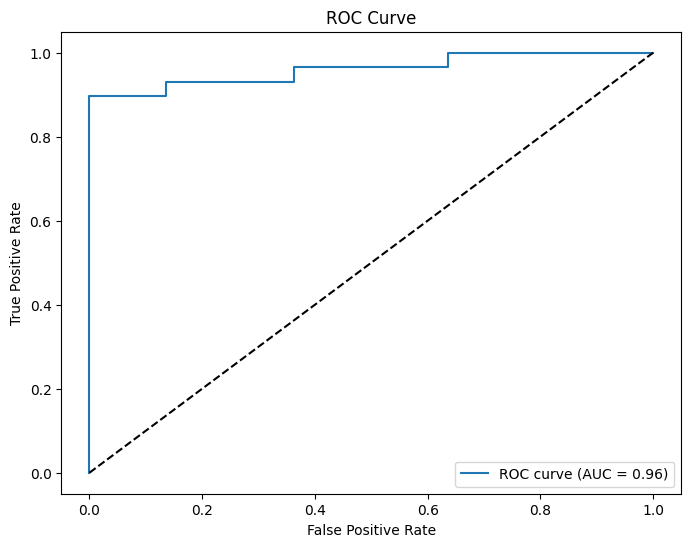

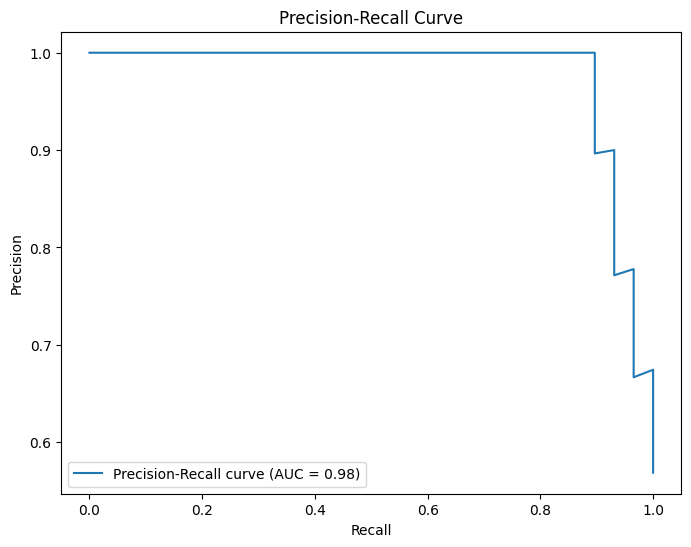

In [59]:

# =============================================================================
# 1. Data  Setup
# =============================================================================

# - Column 0: "Label" (0 = non-PDAC, 1 = PDAC)
# - Column 1: "Sample" (identifier)
# - Columns 2 Gene expression features

# Extract features and labels
X_train = train_data.iloc[:, :-1].values  # All columns except the last (features)
Y_train = train_data.iloc[:, -1].values   # Last column (labels)

X_test = test_data.iloc[:, :-1].values  # All columns except the last (features)
Y_test = test_data.iloc[:, -1].values   # Last column (labels)

xTrain = xTrain.reshape(xTrain.shape[0], -1)
xTest = xTest.reshape(xTest.shape[0], -1)

# =============================================================================
# 2. Data Preprocessing
# =============================================================================

# Converting to float32 to ensure compatibility with TensorFlow
xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')

# Normalizing using StandardScaler (appropriate for gene expression data)
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

# Defining the algorithm type: 'CNN'
algoName = 'CNN'
if algoName == 'CNN':
    # Expanding dimensions for Conv1D: expected input shape is (samples, features, channels)
    xTrain = np.expand_dims(xTrain, axis=2)
    xTest = np.expand_dims(xTest, axis=2)

yTrain = yTrain.reshape(-1, 1).astype('float32')
yTest = yTest.reshape(-1, 1).astype('float32')

print("xTrain shape:", xTrain.shape, "yTrain shape:", yTrain.shape)
print("xTest shape:", xTest.shape, "yTest shape:", yTest.shape)

# Further splitting training data into server and client portions for federated learning
xServer, xClients, yServer, yClients = train_test_split(xTrain, yTrain, test_size=0.80, random_state=523)

# =============================================================================
# 3. Helper Functions and Model Creation
# =============================================================================

def my_metrics(y_true, y_pred):
    # For binary prediction, thresholding the sigmoid output at 0.5
    pred = (y_pred > 0.5).astype(int)
    true = y_true.astype(int)
    accuracy = accuracy_score(true, pred)
    precision = precision_score(true, pred, average='weighted', zero_division=0)
    recall = recall_score(true, pred, average='weighted', zero_division=0)
    f1Score = f1_score(true, pred, average='weighted', zero_division=0)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall    : {}".format(recall))
    print("F1-Score  : {}".format(f1Score))
    cm = confusion_matrix(true, pred)
    print("Confusion Matrix:\n", cm)
    return accuracy, precision, recall, f1Score

verbose, epochs, batch_size = 0, 10, 64
activationFun = 'relu'
optimizerName = 'Adam'

def createDeepModel():
    model = Sequential()
    if algoName == 'CNN':
        model.add(Conv1D(filters=10, kernel_size=3, activation=activationFun, input_shape=(X_full.shape[1], 1)))
        model.add(Dropout(0.1))
        model.add(MaxPooling1D(pool_size=3))
        model.add(BatchNormalization())
        
        model.add(Conv1D(filters=5, kernel_size=3, activation=activationFun))
        model.add(Dropout(0.05))
        model.add(MaxPooling1D(pool_size=3))
        model.add(BatchNormalization())
        
        model.add(Flatten())
        model.add(Dense(100, activation=activationFun))
        model.add(Dense(50, activation=activationFun))
        model.add(Dense(30, activation=activationFun))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer=optimizerName, metrics=['accuracy'])
        
    elif algoName == 'ANN':
        model.add(Dense(200, input_dim=X_full.shape[1], activation=activationFun))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer=optimizerName, metrics=['accuracy'])
        
    elif algoName == 'DNN':
        model.add(Dense(200, input_dim=X_full.shape[1], activation=activationFun))
        model.add(Dense(100, activation=activationFun))
        model.add(Dense(50, activation=activationFun))
        model.add(Dense(25, activation=activationFun))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer=optimizerName, metrics=['accuracy'])
    return model

def predictTestData(yPredict, yTest):
    return my_metrics(yTest, yPredict)

def sumOfWeights(weights):
    return sum(map(sum, weights))

def getWeights(model):
    return model.get_weights()

# Initializing the central deep model
deepModel = createDeepModel()

# =============================================================================
# 4. Federated Learning Simulation Setup
# =============================================================================

numOfIterations = 10
numOfClients = 5
modelLocation = "Models/" + str(algoName) + "_Sync_users_" + str(numOfClients) + "_" + activationFun + "_" + optimizerName + "_FL_Model.h5"
accList, precList, recallList, f1List = [], [], [], []
deepModelAggWeights = []
firstClientFlag = True

def updateServerModel(clientModel, clientModelWeight):
    global firstClientFlag
    for ind in range(len(clientModelWeight)):
        if firstClientFlag:
            deepModelAggWeights.append(clientModelWeight[ind])
        else:
            deepModelAggWeights[ind] = (deepModelAggWeights[ind] + clientModelWeight[ind])

def updateClientsModels():
    global clientsModelList, deepModel
    clientsModelList.clear()
    for clientID in range(numOfClients):
        m = keras.models.clone_model(deepModel)
        m.set_weights(deepModel.get_weights())
        clientsModelList.append(m)

# ----- 1. Training central model initially on server data -----
def trainInServer():
    deepModel.fit(xServer, yServer, epochs=epochs, batch_size=batch_size, verbose=verbose)
    deepModel.save(modelLocation)
trainInServer()

# ----- 2. Preparing client data and initialize client models -----
xClientsList = []
yClientsList = []
clientsModelList = []
clientDataInterval = len(xClients) // numOfClients
lastLowerBound = 0

for clientID in range(numOfClients):
    xClientsList.append(xClients[lastLowerBound: lastLowerBound + clientDataInterval])
    yClientsList.append(yClients[lastLowerBound: lastLowerBound + clientDataInterval])
    # Loading the model without the old optimizer state
    model = load_model(modelLocation, compile=False)
    # Recompiling the model with a fresh optimizer instance
    model.compile(loss='binary_crossentropy', optimizer=optimizerName, metrics=['accuracy'])
    clientsModelList.append(model)
    lastLowerBound += clientDataInterval

# Performing initial local training on each client's model
for clientID in range(numOfClients):
    clientsModelList[clientID].fit(xClientsList[clientID], yClientsList[clientID], epochs=epochs, batch_size=batch_size, verbose=verbose)
        
start_time = time.time()
process = psutil.Process(os.getpid())

# ----- 3. Federated Learning Rounds -----
for iterationNo in range(1, numOfIterations + 1):
    print("Iteration", iterationNo)
    for clientID in range(numOfClients):
        print("clientID", clientID)
        clientsModelList[clientID].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        clientsModelList[clientID].fit(xClientsList[clientID], yClientsList[clientID], epochs=epochs, batch_size=batch_size, verbose=verbose)
        clientWeight = clientsModelList[clientID].get_weights()
        updateServerModel(clientsModelList[clientID], clientWeight)
        firstClientFlag = False
    # Averaging the accumulated weights from all clients
    for ind in range(len(deepModelAggWeights)):
        deepModelAggWeights[ind] /= numOfClients

    dw_last = deepModel.get_weights()
    for ind in range(len(deepModelAggWeights)):
        dw_last[ind] = deepModelAggWeights[ind]
     
    # Updating the central model with the aggregated weights
    deepModel.set_weights(dw_last)
    print("Server's model updated")
    print("Saving model . . .")
    deepModel.save(modelLocation)
    # Distributing the updated central model to all clients
    updateClientsModels()
    firstClientFlag = True
    deepModelAggWeights.clear()

    yPredict = deepModel.predict(xTest)
    acc, prec, recall, f1Score = predictTestData(yPredict, yTest)
    accList.append(acc)
    precList.append(prec)
    recallList.append(recall)
    f1List.append(f1Score)
    print("Acc:\n", acc)
    print("Prec:\n", prec)
    print("Recall:\n", recall)
    print("F1-Score:\n", f1Score)

memoryTraining = process.memory_percent()
timeTraining = time.time() - start_time
print("---Memory---", memoryTraining)
print("--- %s seconds (TRAINING)---" % (timeTraining))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
history = deepModel.fit(xServer, yServer, epochs=epochs, validation_data=(xTest, yTest))
learningAccs = history.history['val_accuracy']
learningLoss = history.history['val_loss']

# Save key performance indicators into a DataFrame
dfSave = pd.DataFrame(columns=['Clients', 'Iterations to converge', 'Accuracy', 'Loss', 'Memory', 'Time'])
dfSaveIndex = 0
saveList = [numOfClients, len(learningLoss), learningAccs[-1], learningLoss[-1], memoryTraining, timeTraining]
dfSave.loc[dfSaveIndex] = saveList

yPredict = deepModel.predict(xTest)
acc, prec, recall, f1Score = predictTestData(yPredict, yTest)

print("Number of users:", numOfClients)
deepModel.save(modelLocation)
print("Epochs:", epochs)
print("BatchSize:", batch_size)
print("Activation:", activationFun, "Optimizer:", optimizerName)
print("Iterations:", numOfIterations)
print("Memory:", memoryTraining)
print("Time:", timeTraining)
print(dfSave)

df_performance_timeRounds = pd.DataFrame({
    'Accuracy': accList,
    'Precision': precList,
    'Recall': recallList,
    'F1-Score': f1List 
})
print(df_performance_timeRounds)

# =============================================================================
# 5. Alternative Evaluation Metrics: ROC and Precision-Recall Curves
# =============================================================================

# Importing additional evaluation metrics and plotting libraries
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Getting prediction probabilities from the model (sigmoid outputs)
y_scores = deepModel.predict(xTest).ravel()  # flatten predictions

# Computing ROC AUC
roc_auc = roc_auc_score(yTest, y_scores)
fpr, tpr, thresholds = roc_curve(yTest, y_scores)

# Computing Precision-Recall AUC
precision, recall, pr_thresholds = precision_recall_curve(yTest, y_scores)
pr_auc = auc(recall, precision)

print("ROC AUC Score:", roc_auc)
print("Precision-Recall AUC Score:", pr_auc)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plotting Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()



In [55]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# K for K-Fold Cross-Validation
K = 5  # 5-Fold CV: 4 folds for training, 1 for validation

# K-Fold object (Stratified ensures class balance across folds)
skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=123)

# Lists to store evaluation metrics for each fold
training_accuracy_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Loop over each fold
fold_no = 1
for train_idx, val_idx in skf.split(xTrain, yTrain):
    print(f"Training on Fold {fold_no}/{K}...")

    # Splitting the dataset into training and validation sets
    xTrain_fold, xVal_fold = xTrain[train_idx], xTrain[val_idx]
    yTrain_fold, yVal_fold = yTrain[train_idx], yTrain[val_idx]

    # New instance of the CNN model for each fold
    model = createDeepModel()

    # Training the model using 4 folds (training data)
    model.fit(xTrain_fold, yTrain_fold, epochs=epochs, batch_size=batch_size, verbose=0)

    # Computing Training Accuracy
    train_accuracy = model.evaluate(xTrain_fold, yTrain_fold, verbose=0)[1]  # Accuracy is typically at index 1
    training_accuracy_list.append(train_accuracy)  # ✅ Store training accuracy

    # Predicting on the validation fold
    yPredict = model.predict(xVal_fold)

    # Computing Validation Accuracy
    acc, prec, rec, f1 = predictTestData(yPredict, yVal_fold)

    # Storing performance metrics
    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)

    print(f"Fold {fold_no} Results - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {acc:.4f}")
    fold_no += 1

# Overall performance across all folds
print(f"\n=== Overall 5-Fold Cross-Validation Results ===")
print(f"Average Training Accuracy: {np.mean(training_accuracy_list):.4f} ± {np.std(training_accuracy_list):.4f}")
print(f"Average Testing (Validation) Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.4f}")
print(f"Average F1-Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.4f}")


Training on Fold 1/5...


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Accuracy  : 0.7666666666666667
Precision : 0.7734189723320158
Recall    : 0.7666666666666667
F1-Score  : 0.7676810334119986
Confusion Matrix:
 [[31  8]
 [13 38]]
Fold 1 Results - Training Accuracy: 0.9917, Validation Accuracy: 0.7667
Training on Fold 2/5...


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy  : 0.8555555555555555
Precision : 0.8584325396825396
Recall    : 0.8555555555555555
F1-Score  : 0.856041900486345
Confusion Matrix:
 [[34  5]
 [ 8 43]]
Fold 2 Results - Training Accuracy: 0.9972, Validation Accuracy: 0.8556
Training on Fold 3/5...


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy  : 0.7333333333333333
Precision : 0.7776623376623377
Recall    : 0.7333333333333333
F1-Score  : 0.7312221672439386
Confusion Matrix:
 [[35  4]
 [20 31]]
Fold 3 Results - Training Accuracy: 0.9194, Validation Accuracy: 0.7333
Training on Fold 4/5...


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy  : 0.8444444444444444
Precision : 0.8490186376381329
Recall    : 0.8444444444444444
F1-Score  : 0.8450638792102206
Confusion Matrix:
 [[34  5]
 [ 9 42]]
Fold 4 Results - Training Accuracy: 0.9917, Validation Accuracy: 0.8444
Training on Fold 5/5...


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Accuracy  : 0.8111111111111111
Precision : 0.822562582345191
Recall    : 0.8111111111111111
F1-Score  : 0.8119298245614036
Confusion Matrix:
 [[34  5]
 [12 39]]
Fold 5 Results - Training Accuracy: 0.9333, Validation Accuracy: 0.8111

=== Overall 5-Fold Cross-Validation Results ===
Average Training Accuracy: 0.9667 ± 0.0332
Average Testing (Validation) Accuracy: 0.8022 ± 0.0463
Average Precision: 0.8162 ± 0.0353
Average Recall: 0.8022 ± 0.0463
Average F1-Score: 0.8024 ± 0.0470
